# Simple Linear Regression

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
dataset=pd.read_csv('D:\Test\Temperature.csv')

In [3]:
dataset

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
...,...,...
3645,27-12-1990,14.0
3646,28-12-1990,13.6
3647,29-12-1990,13.5
3648,30-12-1990,15.7


In [4]:
dataset.shape


(3650, 2)

In [5]:
dataset.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [6]:
dataset.head(10)

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
5,06-01-1981,15.8
6,07-01-1981,15.8
7,08-01-1981,17.4
8,09-01-1981,21.8
9,10-01-1981,20.0


In [9]:
type(dataset['Temp'])

pandas.core.series.Series

In [10]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


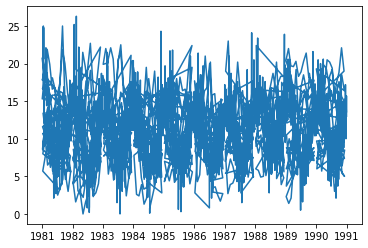

In [11]:
plt.plot(dataset['Date'],dataset['Temp'])

In [12]:
#Create 12 months moving average
dataset['MA12']=dataset['Temp'].rolling(12).mean()

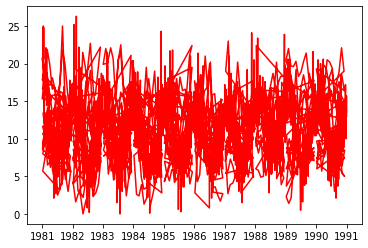

In [13]:
plt.plot(dataset['Date'],dataset['Temp'], color='red')

In [14]:
# extract month and year from dates
dataset['Month'] = [i.month for i in dataset['Date']]
dataset['Year'] = [i.year for i in dataset['Date']]

In [15]:
# create a sequence of numbers
dataset['Series'] = np.arange(1,len(dataset)+1)

# drop unnecessary columns and re-arrange
dataset.drop(['Date', 'MA12'], axis=1, inplace=True)
dataset = dataset[['Series', 'Year', 'Month', 'Temp']] 

# check the head of the dataset
dataset.head()

,Series,Year,Month,Temp
0,1,1981,1,20.7
1,2,1981,2,17.9
2,3,1981,3,18.8
3,4,1981,4,14.6
4,5,1981,5,15.8


In [16]:
#Independent Variable
X=dataset.iloc[:,:-1].values

#Dependent Variable
y=dataset.iloc[:,-1].values

In [17]:
X

array([[   1, 1981,    1],
       [   2, 1981,    2],
       [   3, 1981,    3],
       ...,
       [3648, 1990,   12],
       [3649, 1990,   12],
       [3650, 1990,   12]], dtype=int64)

In [18]:
y

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

# Splitting the dataset (Training and Testing)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=1/3, random_state=0)

In [20]:
X_train


array([[3562, 1990,    4],
       [1062, 1983,   11],
       [ 998, 1983,    9],
       ...,
       [1654, 1985,    7],
       [2608, 1988,    2],
       [2733, 1988,    6]], dtype=int64)

In [21]:
X_test

array([[3517, 1990,    8],
       [ 570, 1982,    7],
       [ 992, 1983,    9],
       ...,
       [3147, 1989,    8],
       [1028, 1983,   10],
       [ 598, 1982,    8]], dtype=int64)

In [22]:
y_train

array([11. , 15.8,  7.6, ...,  5.8, 14.8,  8. ])

In [23]:
y_test

array([ 9.7,  6.6, 12. , ...,  5.8, 12.9, 13.2])

# Training the Simple Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Prediction of Testing dataset

In [25]:
y_pred=reg.predict(X_test)

In [26]:
y_pred

array([10.94451163, 10.9524679 , 10.45613512, ..., 10.9659717 ,
       10.11583706, 10.6944592 ])

# Visualising the results

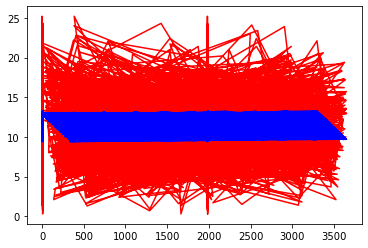

In [27]:
plt.plot(X_train,y_train,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

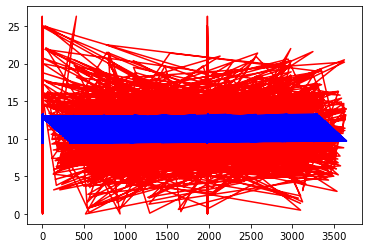

In [28]:
plt.plot(X_test,y_test,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

In [29]:
#Coefficient
b=reg.coef_

In [30]:
b

array([-0.01028617,  3.78442262,  0.03000405])

In [31]:
#Intercept
a=reg.intercept_

In [32]:
a

-7484.120084171965